Successfully loaded dataset infocomm-industry-revenue.csv
Successfully loaded dataset domestic-revenue-of-infocomm-industry-by-market-segment.csv

===== Text-based analysis for infocomm-industry-revenue.csv =====

This is the shape of the dataset
(17, 2)


This is the index of the dataset
RangeIndex(start=0, stop=17, step=1)


These are the columns in the dataset
Index(['year', 'infocomm_industry_revenue'], dtype='object')


The total number of non-NA values in this dataset is:
year                         17
infocomm_industry_revenue    17
dtype: int64


A summary of this dataset is shown below:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       17 non-null     int64  
 1   infocomm_industry_revenue  17 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 400.0 bytes


A descriptive

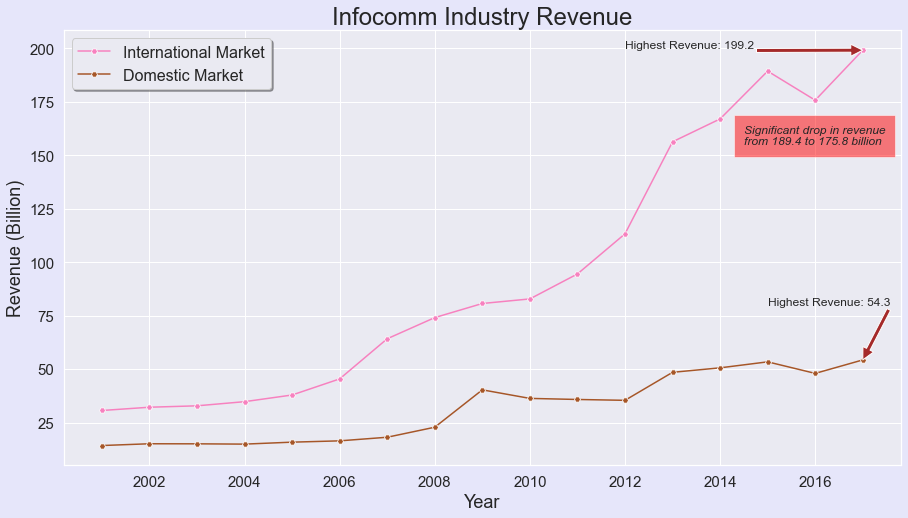

In [1]:
### LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### LOAD DATA FROM CSV TO DATAFRAME
# Function to return dataframe with try-except to handle errors
def load_csv(filename):
    try:
        df = pd.read_csv('C:/Infocomm Analysis/Datasets/' + filename, sep=',')
        print(f"Successfully loaded dataset {filename}")
        return df
    except:
        print(f"Error loading dataset {filename}")

# Define filenames
dataset1 = "infocomm-industry-revenue.csv"
dataset2 = "domestic-revenue-of-infocomm-industry-by-market-segment.csv"

# Stores dataframe into variables
revenue_df = load_csv(dataset1)
domestic_revenue_df = load_csv(dataset2)
    
    
### TEXT-BASED ANALYSIS
def text_based_analysis(dataset, df, summary_col):
    # Prints title to dataset
    print(f"\n===== Text-based analysis for {dataset} =====\n")
    
    # Prints the shape
    print(f"This is the shape of the dataset\n{df.shape}\n\n")
    
    # Prints the index
    print(f"This is the index of the dataset\n{df.index}\n\n")
    
    # Prints the columns
    print(f"These are the columns in the dataset\n{df.columns}\n\n")
    
    # Prints total number of non-NA values
    print(f"The total number of non-NA values in this dataset is:\n{df.count()}\n\n")

    # Prints summary
    print(f"A summary of this dataset is shown below:")
    df.info()

    # Prints descriptive statistical summary
    print(f"\n\nA descriptive statistical summary of this dataset is shown below:\n{df[summary_col].describe()}\n")

# Pass filename, dataframe and column name into text based analysis function
text_based_analysis(dataset1, revenue_df, "infocomm_industry_revenue")
text_based_analysis(dataset2, domestic_revenue_df, "domestic_revenue")
    
    
### CHART PLOTTING
## Data Manipulation
# Function to find and return the sum revenue, max revenue and max year by grouping dataframe
def data_extraction(df, column_to_groupby):
    sum_df = df.groupby('year')[column_to_groupby].sum()
    max_revenue = sum_df.max()
    max_year = sum_df.idxmax()
    
    return sum_df, max_revenue, max_year

# Pass dataframe and column name to group by into data extraction function
sum_domestic_revenue_by_year, max_domestic, max_domestic_year = data_extraction(domestic_revenue_df, 'domestic_revenue')
sum__revenue_by_year, max_revenue, max_year = data_extraction(revenue_df, 'infocomm_industry_revenue')


## Plotting
# Set plot style(theme, palette, figure size and background color)
sns.set_theme(style="darkgrid")
sns.set_palette('Set1_r')
fig, ax = plt.subplots(figsize = (15, 8))
fig.set_facecolor('lavender')

# Plotting domestic and international revenue line
ax = sns.lineplot(x = "year", y = "infocomm_industry_revenue", marker = "H", data = revenue_df)
ax1 = sns.lineplot(x = "year", y = sum_domestic_revenue_by_year.values, marker = "H", data = revenue_df)

# Set plot attributes
plt.title('Infocomm Industry Revenue', fontsize=24)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Revenue (Billion)', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(labels=["International Market", "Domestic Market"],shadow=True, prop={'size': 16})

# Annotations
# Function to annotate highest revenue point for domestic and international market
def annotations(max_revenue, max_year, xytext):
    text = 'Highest Revenue: ' + str(max_revenue)
    ax.annotate(text, xy=(max_year, max_revenue), xytext=xytext, arrowprops = dict(facecolor = 'brown'))

annotations(max_domestic, max_domestic_year, (2015,80))
annotations(max_revenue, max_year, (2012,200))

# Annotating with text box
plt.text(2014.5, 155, 'Significant drop in revenue\nfrom 189.4 to 175.8 billion', style='italic', bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

plt.show()

# Documentation

### Central Theme: Infocomm Industry

**Hypothesis:** The performance of the infocomm industry increases over the years because it has an increase in manpower due to the number of people who are eager to join the ever expanding IT sector.

**Title of data analysis:** Evaluating the Overall International and Domestic Performance in the Infocomm Industry<br>

**URL of datasets used:**<br>Dataset 1: [Infocomm Industry Revenue](https://data.gov.sg/dataset/infocomm-industry-revenue?view_id=4d703109-9c72-484b-9cc9-9559d0ed93cf&resource_id=0e763f43-8cd9-46ef-ae93-673f27446e89)<br>
Dataset 2: [Domestic Revenue of Infocomm Industry by Market Segment](https://data.gov.sg/dataset/domestic-revenue-of-infocomm-industry-by-market-segment?view_id=2613dcdc-1537-451b-a99d-f5217ebc5469&resource_id=0637fd8b-af8f-45c6-8996-a6bae892145f)<br>

**Nature of dataset:**<br>
Data Attributes:
<ol>
    <li>Dataset 1: Infocomm Industry Revenue
        <ul>
            <li>year - Integer. Data is collected from 2001 to 2017</li>
            <li>infocomm_industry_revenue - Float Integer. Value of international infocomm industry revenue in billion</li>
        </ul>
    </li>
    <br>
    <li>Dataset 2: Domestic Revenue of Infocomm Industry by Market Segment
        <ul>
            <li>year -  Integer. Data is collected from 2001 to 2017</li>
            <li>market_segment - String. Revenue is categorised into five segments which are hardware, software, it_services, telecommunication_services and content_services</li>
            <li>domestic_revenue - Float Integer. Value of domestic infocomm industry revenue by market segment in billion</li>
        </ul>
    </li>
</ol>        

**Questions to gain deeper insight:**
<ol>
    <li>How does the overall revenue for international and domestic infocomm industry change over the years?</li>
    <li>Is the trend of revenue consistent for both markets?</li>
    <li>Does international revenue affect domestic revenue?</li>
</ol>    

**Process to analyse the dataset/ Storyline:**
<ol>
    <li>By observing the trend of revenue of the infocomm industry, we can understand the current overall performance of the industry and whether it is declining which might affect the probability of finding a career.</li>
    <li>The line chart above represents the revenue for the domestic and international infocomm industry from the year 2001 to 2017. The x-axis represents the year and the y-axis represents the revenue in billion.</li>
    <li>The purpose of plotting both domestic and international market revenue in the chart is to gauge how well Singapore's infocomm industry is doing compared to the global market.</li>
    <li>Due to the lack of domestic data, the same domestic revenue dataset will be used in multiple analysis. In this analysis, domestic revenue by market segment is summed up by year using the groupby and sum function.</li>
</ol>    

**Insights:**
<ol>
    <li>The revenue in <strong>international</strong> market shows a period of growth over the years, a massive increase from 2010 to 2013 and a decline near the end from the year 2015 to 2016.</li>
    <li>The revenue in <strong>domestic market</strong> shows a plateau in the beginning and starts increasing from 2008. From there, the revenue fluctuates between the 30 billion to 50 billion range.</li>
    <li>The trendline for <strong>international market</strong> has a considerably consistent trend except for the year 2016 where revenue drops from 189.4 billion to 175.8 billion.</li>
    <li>Domestic revenue is mostly connected to international revenue except for the year 2009 to 2012 where domestic revenue decreases from 40.3 billion to to 35.4 billion while international revenue rises from 80.7 billion to 113 billion.</li>
    <li>Starting from the year 2014, <strong>domestic revenue</strong> enters the 50 billion range which may be a result of the Smart Nation initiative that was launched in 2014 by Prime Minister Lee Hsien Loong to digitalise the country (Singapore: the world’s smartest city, 2020).
</ol>    

**Conclusion:**<br>
Based on the trend for both markets, we can expect the revenue for infocomm industry to continue increasing or maintain its consistency in the future.

**References**<br>
Thales Group. 2020. Singapore: the world’s smartest city. [online] Available at: <https://www.thalesgroup.com/en/worldwide-digital-identity-and-security/iot/magazine/singapore-worlds-smartest-city> [Accessed 29 January 2022].